# SafeComm-Digital-Security-Solutions

Welcome to SafeComm Digital Security Solutions! In the modern digital age, people across the globe
communicate largely through text messages. SMSs have become an integral part of our daily lives.
However, with this ease of communication, there comes a dark side: SMS-based fraud. Unsuspecting
individuals often receive malicious or scam texts intending to deceive or cause harm.
SafeComm has recently partnered with a major telecom provider that has shared anonymized SMS
data. This dataset comprises a mix of regular day-to-day messages and some potentially fraudulent
ones. The objective is to design a mechanism that identifies and flags these fraudulent messages
automatically. This way, we can warn users or even prevent these messages from being delivered
altogether.

# *Dataset features*

• Fraudulent: Binary indicator if the SMS is fraudulent (1 for Yes, 0 for No)

• SMS Text: The content of the SMS

• ID: A unique identifier for each SMS

• Date and Time: Timestamp indicating when the SMS was sent

# *Assignment*

• Perform an Explanatory data analysis (EDA) with visualization using the entire dataset..

• Preprocess the dataset (impute missing values, encode categorical features with one-hot
encoding). Your goal is to estimate whether an SMS is fraudulent

• Define whether this is a regression, classification or clustering problem, explain why and
choose your model design accordingly. Test at least 3 different models. First, create a
validation set from the training set to analyze the behaviour with the default
hyperparameters. Then use cross-validation to find the best set of hyperparameters. You
must describe every hyperparameter tuned (the more, the better)

• Select the best architecture using the right metric

• Compute the performances of the test set

• Explain your results

* First, lets begin by importing all the necessary libraries we will be utilising.

In [ ]:
import numpy as np
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import requests
import zipfile
import os

from nltk.tokenize import word_tokenize
import nltk, spacy
import re, string, unicodedata
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


## EDA analysis ##

* Understanding the Dataset: We use python libraries to scan the dataset and gain insight of its structure

* Checking for Integrity: We scan the dataset to identify NaN values and check if the dataset is consistent

* Visualize Distribution of Data: using sns and matplotlib we can see how the data is structured in the cartesian plane

* Use pairplots for identify relationships: Apparently not necessary

# Showing the dataframe

* here we display the complete dataset in a dataframe with 4 columns:
  - *Fraudolent*: a binary value, that acts like a boolean, that assumes the value of 0 when the sms is not spam; 1 when it is fraudolent.
  - *SMS test*: a string of text, representing an sms.
  - *ID*: a unique alphanumeric code of 7 digits that represents the sms message.
  - *Date and Time*: time in which the message has been sent (it is formatted as date and time)

* Plus, for operational purposes, we needed to reformat the name of the *SMS test* and *Date and Time* columns.

In [ ]:
sms_df = pd.read_csv("sms.csv")
sms_df.rename(columns={'SMS test': 'SMS_test'}, inplace=True)
sms_df.rename(columns={'Date and Time': 'Date_and_Time'}, inplace=True)
sms_df.head()

,Fraudolent,SMS_test,ID,Date_and_Time
0,0,Squeeeeeze!! This is christmas hug.. If u lik ...,1EWYRBL,2017-12-02
1,0,And also I've sorta blown him off a couple tim...,ZY4PDK7,2018-03-23
2,0,Mmm thats better now i got a roast down me! i...,KLUX2C6,2016-10-29
3,0,Mm have some kanji dont eat anything heavy ok,955HXJ0,2018-04-12
4,0,So there's a ring that comes with the guys cos...,00Q6EUC,2016-08-01


* Let's display the number of rows present in our dataset to gain an understanding of just how many entries we are working with and the dimensions of the dataset.

In [ ]:
print("Rows:",sms_df.shape[0])

Rows: 5572


* Now let's count the number of NaN values we have in our dataset.

In [ ]:
nan_count = sms_df.isna().sum()

print("NaN values in each column:")
print(nan_count)

NaN values in each column:
Fraudolent       0
SMS_test         0
ID               0
Date_and_Time    0
dtype: int64


Fortunately we don't have NaN values in the dataset, so it is consistent and we do not need to impute missing values.

* Next, we need a clear understanding of just how many of the SMS's in our dataset are actually Fraudulent.

In [ ]:
print("\nFraudolent column summary:")
print(sms_df['Fraudolent'].value_counts())

fraudolent_count = sms_df['Fraudolent'].value_counts()[1]
non_fraudolent_count = sms_df['Fraudolent'].value_counts()[0]

percentage_fraudolent = (fraudolent_count / (fraudolent_count + non_fraudolent_count)) * 100
percentage_non_fraudolent = (non_fraudolent_count / (fraudolent_count + non_fraudolent_count)) * 100

print("Percentage of fraudolent messages:", percentage_fraudolent,'%')
print("Percentage of non-fraudolent messages:", percentage_non_fraudolent,'%')


Fraudolent column summary:
Fraudolent
0    4825
1     747
Name: count, dtype: int64
Percentage of fraudolent messages: 13.406317300789663 %
Percentage of non-fraudolent messages: 86.59368269921033 %


* Here we can clearly see that there are 4825 Non-Fraudulent messages and 747 Fraudulent messages.

* Furthermore we have displayed the percentage of fraudulent and non-fraudulent messages in the dataset. We can see that the dataset is unbalanced, favouring non-fraudulent messages.

## Data Distribution and Correlations ##

* In this section, we are analyzing the distribution of data in the cartesian plane utilizing sns and matplotlib tools.

* In particular, it seems that the most interesting feature to study in the dataset (in terms of distribution analysis) is the *Fraudolent* column. Since it is one of the few features that are useful for the purpose of the project.

# Let's Get Plotting!

* Create a distribution plot (histogram) to visualize the data

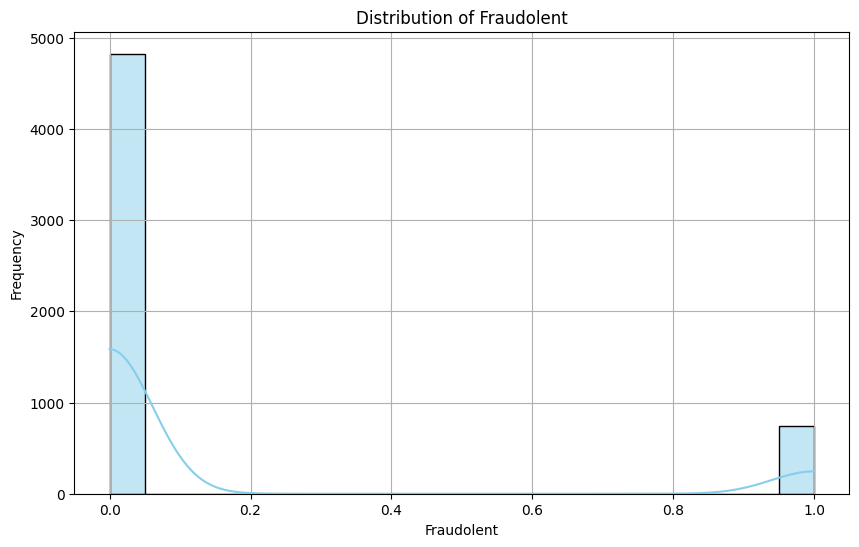

In [ ]:
column_to_analyze = 'Fraudolent'

plt.figure(figsize=(10, 6))
sns.histplot(sms_df[column_to_analyze], kde=True, bins=20, color='skyblue')
plt.title(f'Distribution of {column_to_analyze}')
plt.xlabel(column_to_analyze)
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

Considering the histogram plotted, it's now clearer than ever just how unbalanced our dataset truly is.

We will definitely need to fix this further down the line...

**Fraudulent Vs. Non-Fraudulent text messages:**

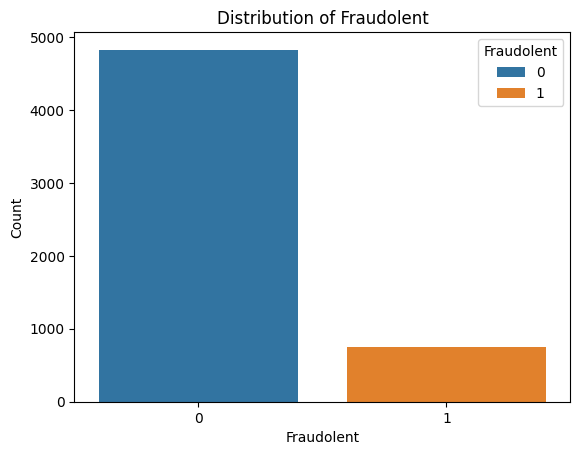

In [32]:
sns.countplot(data=sms_df, x='Fraudolent', hue='Fraudolent')
plt.title('Distribution of Fraudolent')
plt.xlabel('Fraudolent')
plt.ylabel('Count')
plt.show()

We also thought to be important to visualize the text length distribution graphically to see if there is any correlation between:
 * Text Length
 * Count of Fraudulent Messages

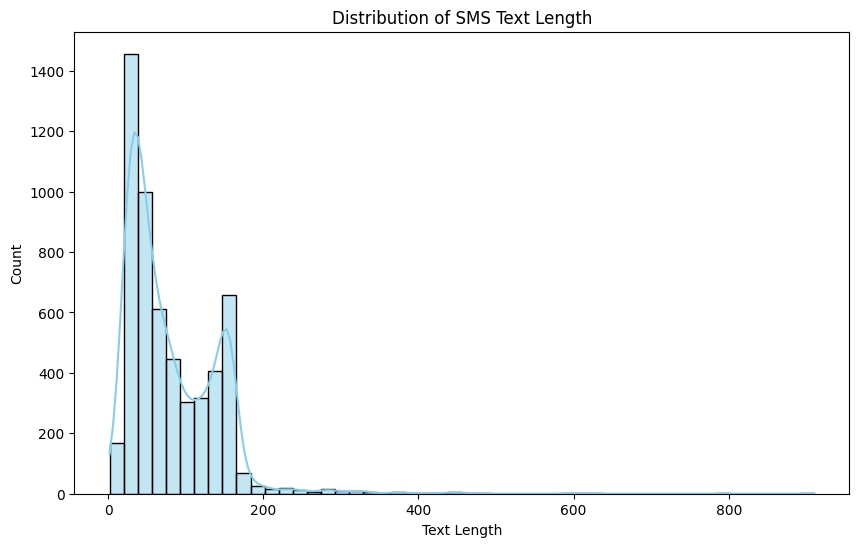

In [ ]:
sms_df['text_length'] = sms_df['SMS_test'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data=sms_df, x='text_length', kde=True, bins=50, color='skyblue')
plt.title('Distribution of SMS Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

While we're visualising our data, let's also consider the Temporal Distribution of the SMS's.

We examine the graph to inspect whether the given data is skewed towards a specific year.

By splitting the date into its compoonents, we can analyze the temporal distribution of the messages.

* This allows us to see that in our dataset the range of years for which we are viewing sent SMS Messages is from 2016 to 2018.

In [ ]:
sms_df.columns
earliest_date = sms_df['Date_and_Time'].min()
latest_date = sms_df['Date_and_Time'].max()
print("Earliest date of an SMS message sent:", earliest_date)
print("Latest date of an SMS message sent:", latest_date)

Earliest date of an SMS message sent: 2016-02-15
Latest date of an SMS message sent: 2018-09-19


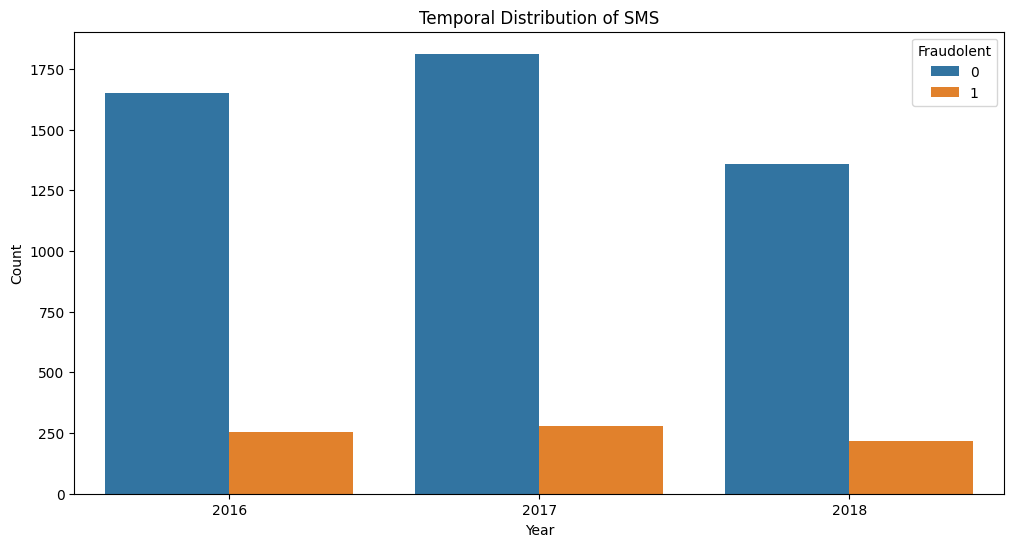

In [ ]:
sms_df['Date_and_Time'] = pd.to_datetime(sms_df['Date_and_Time'])

sms_df['Year'] = sms_df['Date_and_Time'].dt.year
sms_df['Month'] = sms_df['Date_and_Time'].dt.month
sms_df['Day'] = sms_df['Date_and_Time'].dt.day

plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Fraudolent', data=sms_df)
plt.title('Temporal Distribution of SMS')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Luckily as shown in the graph, there is no strong correlation between the number of fraudulent messages when looking at individual years.

They seem to be fairly well-dispersed across the years.


* Now lets build a correlation matrix to see exactly what columns are correlated (if any)

* Doing the correlation matrix, we only need to correlate the Fraudulent feature with the text length, so we can drop the other columns (ID, Date_and_Time, Year, Month, Day)

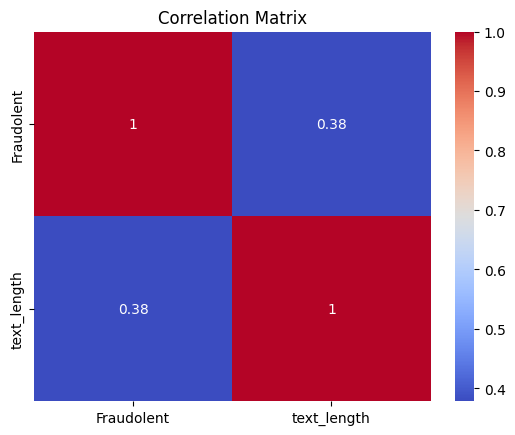

In [ ]:
df_dropped = sms_df.drop(['Year', 'Month', 'Day', 'ID', 'Date_and_Time'], axis=1, inplace=False)
correlation_matrix = df_dropped.corr(numeric_only='False')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Given the correlations calculated, we can see that there is no strong correlation whatsoever between text_length and Fraudolent values.

* We can also see that the correlation between the variables is not strong enough to cause multicollinearity issues.

* We can interpet the correlation between Fraudolent and text_length as a weak correlation at most.

In [ ]:
sms_df.corr(numeric_only='False')

,Fraudolent,text_length,Year,Month,Day
Fraudolent,1.000000,0.378359,0.004349,-0.004380,-0.004535
text_length,0.378359,1.000000,0.029498,-0.010077,0.014077
Year,0.004349,0.029498,1.000000,-0.304300,-0.054934
Month,-0.004380,-0.010077,-0.304300,1.000000,0.007355
Day,-0.004535,0.014077,-0.054934,0.007355,1.000000


* By analyzing the correlation matrix, we can determine the following:
    
    • The correlation coefficient ranges from -1 to 1. A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.
    
    • Positive correlation coefficients indicate that the variables tend to increase or decrease together.
    
    • Negative correlation coefficients indicate that as one variable increases, the other tends to decrease.
   
    • The closer the correlation coefficient is to 1 or -1, the stronger the correlation.
    
    • A correlation coefficient close to O indicates no or weak correlation.

* Based on the correlation matrix, we can conclude that there is no strong correlation between the two most important variables in the dataset. This means that all variables can be used for analysis without causing multicollinearity issues.

* Here we wanted to experiment a little bit with the data. We wanted to try to see if there is some correlation between a fraudulent sms and an Uppercase word

* Since in real world scenarios could be pretty common encountering fraudulent messages showing words such as: FREE, SIGN UP, GUARANTEED... in uppercase letters to catch our attention

* We will firstly plot the 10 most recurrent words in non-fraudulent messages

C:\Users\Thebrickster21\AppData\Local\Temp\ipykernel_14212\4235868408.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=word_df.head(10), palette='viridis')


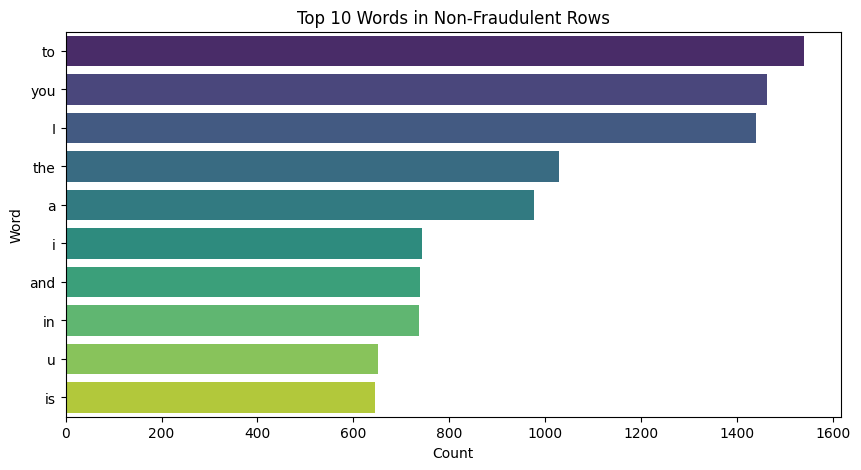

In [ ]:
non_fraudulent_text = ' '.join(df_dropped[df_dropped['Fraudolent'] == 0]['SMS_test'])

words = non_fraudulent_text.split()
word_counts = pd.Series(words).value_counts()

word_df = pd.DataFrame({'Word': word_counts.index, 'Count': word_counts.values})

plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Word', data=word_df.head(10), palette='viridis')
plt.title('Top 10 Words in Non-Fraudulent Rows')
plt.show()

* 10 most recurrent words in fraudulent messages

C:\Users\Thebrickster21\AppData\Local\Temp\ipykernel_14212\1006736574.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=word_df.head(10), palette='viridis')


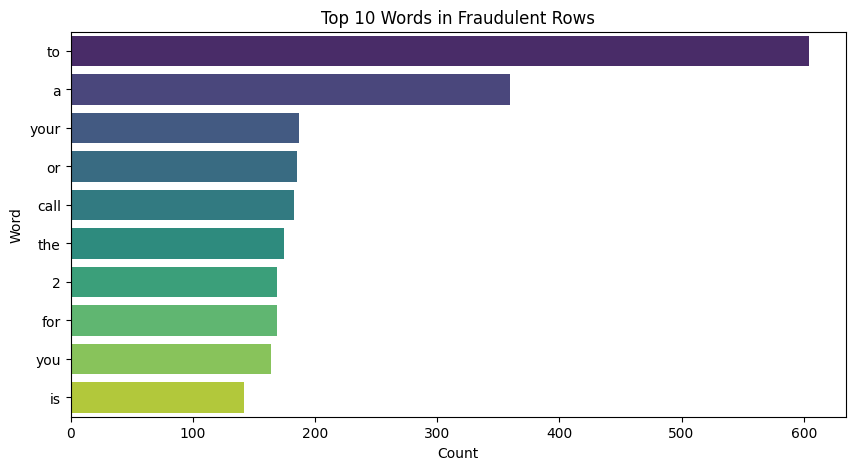

In [ ]:
fraudulent_text = ' '.join(df_dropped[df_dropped['Fraudolent'] == 1]['SMS_test'])

words = fraudulent_text.split()
word_counts = pd.Series(words).value_counts()

word_df = pd.DataFrame({'Word': word_counts.index, 'Count': word_counts.values})

plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Word', data=word_df.head(10), palette='viridis')
plt.title('Top 10 Words in Fraudulent Rows')
plt.show()

* We can clearly see that from these results it's quite impossible to use this feature as a discriminator for fraudulence.

* Indeed, we tried with Uppercase letters (first showing up non-fraudulent and then fraudulent top 10 uppercase words)

C:\Users\Thebrickster21\AppData\Local\Temp\ipykernel_14212\4014668508.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=word_df.head(10), palette='viridis')


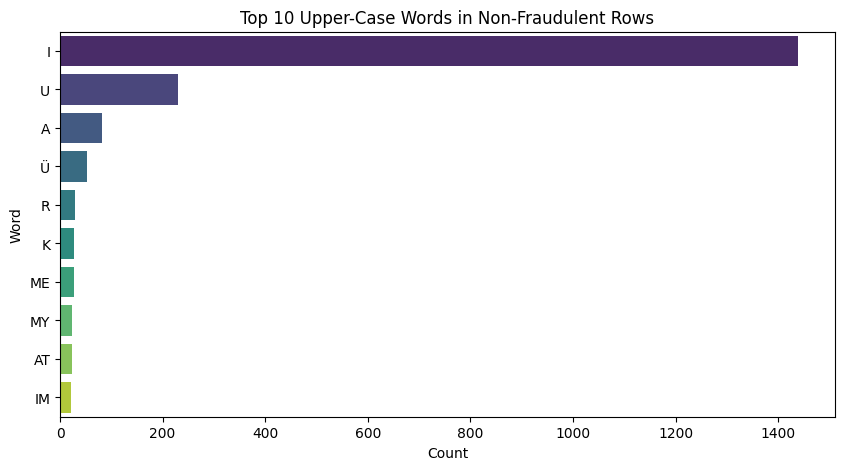

In [ ]:
non_fraudulent_UC_text = ' '.join(df_dropped[df_dropped['Fraudolent'] == 0]['SMS_test'])

capital_words = [word for word in non_fraudulent_UC_text.split() if word.isupper()]


words = non_fraudulent_UC_text.split()
word_counts = pd.Series(capital_words).value_counts()


word_df = pd.DataFrame({'Word': word_counts.index, 'Count': word_counts.values})

plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Word', data=word_df.head(10), palette='viridis')
plt.title('Top 10 Upper-Case Words in Non-Fraudulent Rows')
plt.show()

C:\Users\Thebrickster21\AppData\Local\Temp\ipykernel_14212\2523494077.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=word_df.head(10), palette='viridis')


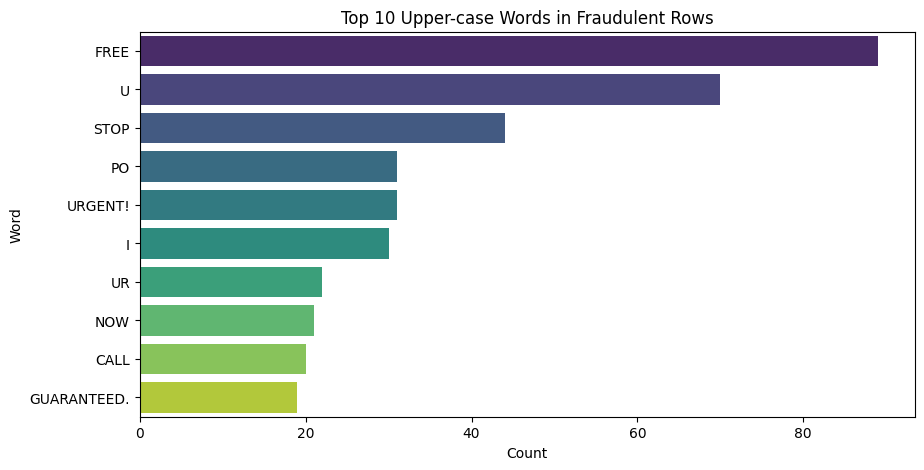

In [ ]:
fraudulent_text = ' '.join(df_dropped[df_dropped['Fraudolent'] == 1]['SMS_test'])

capital_words = [word for word in fraudulent_text.split() if word.isupper()]
word_counts = pd.Series(capital_words).value_counts()

word_df = pd.DataFrame({'Word': word_counts.index, 'Count': word_counts.values})[:11]


plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Word', data=word_df.head(10), palette='viridis')
plt.title('Top 10 Upper-case Words in Fraudulent Rows')
plt.show()

* We have noticed that fraudulent messages contain some words that are particular and are not ambiguous in respect to the non-fraudulent ones. So, we decided to take in consideration the 10 Upper-Case most frquent words in fraudulent messages in order to find a correlation in the matrix with text lenght and obviously the fraudulence.

* We add, in this way, another feature to our dataset... the "word_presence", a binary value (0,1) respectively for lack of the word(0) and presence (1)

In [ ]:
most_frequent_words_set = set(word_df['Word'])

df_dropped['word_presence'] = df_dropped['SMS_test'].apply(lambda x: any(word in most_frequent_words_set for word in x.split()))

df_dropped['word_presence'] = df_dropped['word_presence'].astype(int)

print(df_dropped['word_presence'].value_counts())

word_presence
0    4024
1    1548
Name: count, dtype: int64


* We can see that there are more messages in which the uppercase words are not present, but for a deeper analysis we would need to know how many of them are fraudulent (to see if this feature could be used as a descriminator of fraudulence)

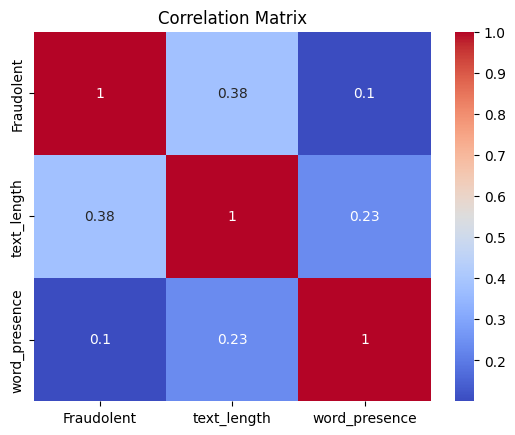

In [ ]:
correlation_matrix = df_dropped.corr(numeric_only='False')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

* From the correlation matrix, we don't see a strong correlation with the text_length and Fraudulence

# Preprocessing

* In this section we will try to transform the data into a more suitable format for machine learning Algorithms, using various methods: cleaning data, encoding categorial features, scaling numerical features.




Now, considering we imported nltk earlier, we will begin utilising our tokenizer.

* We download our stopwords
* We tokenize the text
* We set English stopwords specifically

In [ ]:
nltk.download('stopwords')

nltk.download('punkt')

tokenizer=ToktokTokenizer()

stopword_list=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thebrickster21\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thebrickster21\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
def remove_between_square_brackets(text):
    return re.sub('', '', text)

df_dropped['SMS_test']=df_dropped['SMS_test'].apply(remove_between_square_brackets)


def remove_special_characters(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

df_dropped['SMS_test']=df_dropped['SMS_test'].apply(remove_special_characters)


def stem_text(text):
  stemmer = PorterStemmer()
  words = word_tokenize(text.lower())
  stemmed_words = [stemmer.stem(word) for word in words if word.isalpha()]
  return " ".join(stemmed_words)


df_dropped['SMS_test']=df_dropped['SMS_test'].apply(stem_text)



stop=set(stopwords.words('english'))
print(stop)



def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text


df_dropped['SMS_test']=df_dropped['SMS_test'].apply(remove_stopwords)

{'on', 'can', 'shan', 'wouldn', "you've", 'both', 'me', 'shouldn', "she's", 'any', 'isn', 'those', 'ma', "shouldn't", 'a', 'you', 'his', 'ain', "doesn't", 'd', 'hasn', 'been', 'these', "weren't", "don't", 'some', 'up', 'y', 'my', 'over', 'couldn', "should've", 'ourselves', 'am', "needn't", 'such', 'themselves', 'further', 'all', 'our', 'but', 'and', 'then', 'needn', 'why', 's', 'were', 'who', 'most', "couldn't", 'haven', 'her', 'having', 'to', 'doesn', 'yours', 'aren', 'by', 'is', "you'd", "that'll", 'same', 'has', 'while', 'mustn', 'herself', 'didn', 'which', 'wasn', 'against', 'very', 'she', 'this', 'him', 'out', 'with', 'do', 'yourself', 'yourselves', "won't", 'too', 'doing', 'from', 'above', 'how', 'down', 'here', "wouldn't", 'that', 'being', 'again', 'himself', "you're", 'about', 'because', 'few', "aren't", 've', 'them', 'after', 'he', 'if', 'now', 'had', "hadn't", 'i', 'be', 'than', "isn't", 'at', 'are', 'there', 'we', 'was', 'll', 'between', 'of', 'did', 'hers', 'under', "didn't

# Bag of Words

* We use Bag of Words (BoW) because it is a popular method used in Natural Language Processing (NLP) to convert text data into numerical features that can be used by machine learning algorithms.

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_dropped['SMS_test'])
y = df_dropped['Fraudolent']

We used BoW for:

* Simplicity
* Efficiency
* Effectiveness

# Resampling and train-test split

* To work on our models let's split the dataset into Train and Test sets.

* To avoid data leakage we decided to implement the RandomOverSampler just on the train set. So at the end of all the preprocessing process. 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print(y_resampled.shape)
print("vs")
print(y_train.shape)

(6812,)
vs
(3900,)


* With the RandomOverSampler we just repeated randomly some instances of the minority class, 'till we reached the same dimensions as the majority one.

# Models

* Finally we came to the hot part of the project... models!

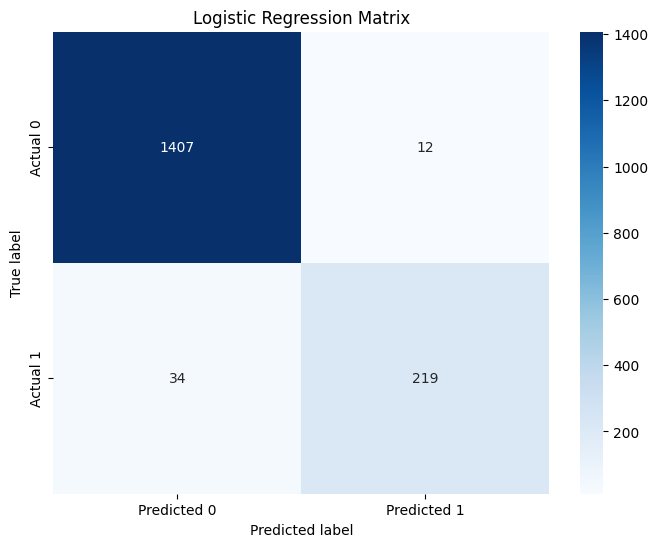

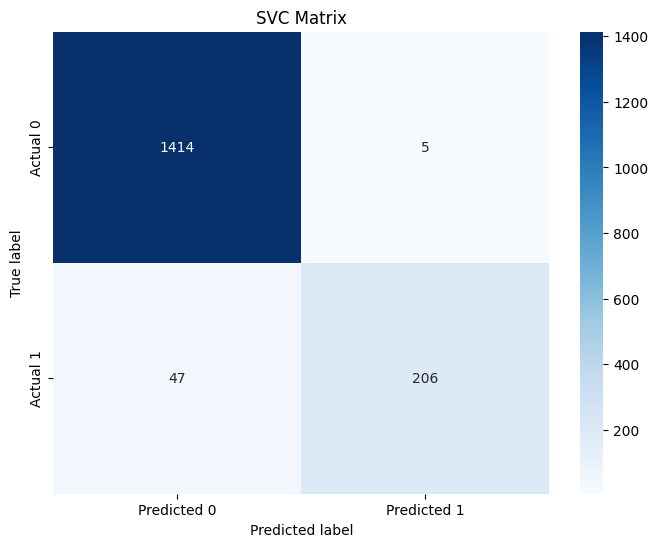

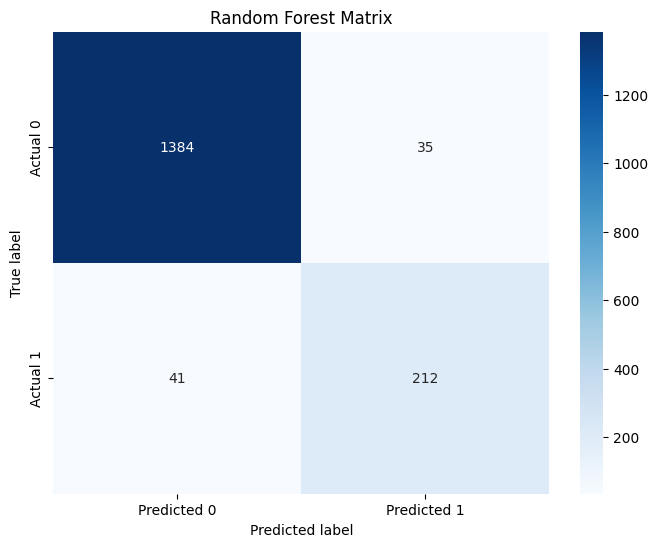

Performance of Logistic Regression:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1419
           1       0.95      0.87      0.90       253

    accuracy                           0.97      1672
   macro avg       0.96      0.93      0.94      1672
weighted avg       0.97      0.97      0.97      1672


------------------------------------------------------------

Performance of SVC:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1419
           1       0.98      0.81      0.89       253

    accuracy                           0.97      1672
   macro avg       0.97      0.91      0.93      1672
weighted avg       0.97      0.97      0.97      1672


------------------------------------------------------------

Performance of Random Forest:

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1419
           1       0.8

In [24]:
logistic_model = LogisticRegression()
svc_model = SVC()
random_forest_model = RandomForestClassifier()


logistic_model.fit(X_resampled, y_resampled)
svc_model.fit(X_resampled, y_resampled)
random_forest_model.fit(X_resampled, y_resampled)


models = {'Logistic Regression': logistic_model, 'SVC': svc_model, 'Random Forest': random_forest_model}
model_performance = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    model_performance[model_name] = {'accuracy': accuracy, 'report': report}
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=['Predicted 0', 'Predicted 1'],yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'{model_name} Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


def print_model_performance(model_name, report):
    print(f"Performance of {model_name}:\n")
    print(report)
    print("\n" + "-"*60 + "\n")


for model_name, performance in model_performance.items():
    print_model_performance(model_name, performance['report'])



# Hyperparameter Tuning

* Aiming for better accuracy

# Logistic Regression Tuning

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

print("Best Parameters for Logistic Regression: ", grid_search_lr.best_params_)
print("Best Score for Logistic Regression: ", grid_search_lr.best_score_)


Best Parameters for Logistic Regression:  {'C': 100, 'solver': 'newton-cg'}
Best Score for Logistic Regression:  0.9807692307692308


# Evaluation

Accuracy of Optimized Logistic Regression:  0.97188995215311
Report for Optimized Logistic Regression:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1419
           1       0.97      0.84      0.90       253

    accuracy                           0.97      1672
   macro avg       0.97      0.92      0.94      1672
weighted avg       0.97      0.97      0.97      1672



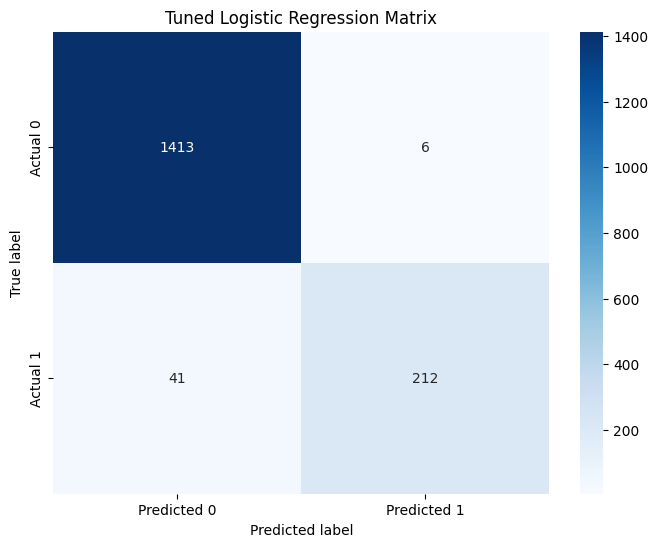

In [26]:

optimized_lr = LogisticRegression(**grid_search_lr.best_params_)
optimized_lr.fit(X_train, y_train)


y_pred_lr = optimized_lr.predict(X_test)
print("Accuracy of Optimized Logistic Regression: ", accuracy_score(y_test, y_pred_lr))

print("Report for Optimized Logistic Regression:\n", classification_report(y_test, y_pred_lr))


conf_matrix = confusion_matrix(y_test, y_pred_lr)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Tuned Logistic Regression Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



# Support Vector Classifier Tuning

In [27]:

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}


grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)


print("Best Parameters for SVC: ", grid_search_svc.best_params_)
print("Best Score for SVC: ", grid_search_svc.best_score_)


Best Parameters for SVC:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score for SVC:  0.9784615384615384


# Evaluation

Accuracy of Optimized SVC:  0.9694976076555024
Classification Report for Optimized SVC:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1419
           1       0.96      0.83      0.89       253

    accuracy                           0.97      1672
   macro avg       0.97      0.91      0.94      1672
weighted avg       0.97      0.97      0.97      1672



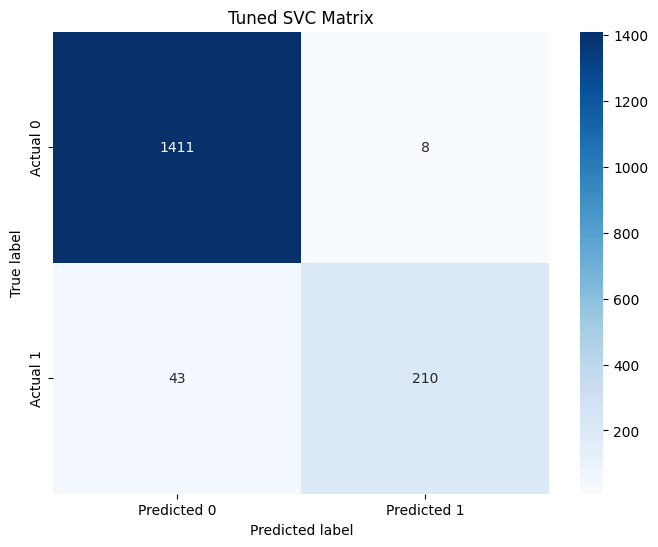

In [28]:

optimized_svc = SVC(**grid_search_svc.best_params_)
optimized_svc.fit(X_train, y_train)


y_pred_svc = optimized_svc.predict(X_test)
print("Accuracy of Optimized SVC: ", accuracy_score(y_test, y_pred_svc))
print("Classification Report for Optimized SVC:\n", classification_report(y_test, y_pred_svc))


conf_matrix = confusion_matrix(y_test, y_pred_svc)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Tuned SVC Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


# Random Forest Tuning

In [29]:

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 6, 8],
    'criterion' :['gini', 'entropy']
}


grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best Score for Random Forest: ", grid_search_rf.best_score_)


KeyboardInterrupt: 

Since the computation is longer than the others, the result is:
* Best Parameters for Random Forest:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}
* Best Score for Random Forest:  0.8879487179487178

# Evaluation

Accuracy of Optimized Random Forest:  0.8588516746411483
Classification Report for Optimized Random Forest:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92      1419
           1       1.00      0.07      0.13       253

    accuracy                           0.86      1672
   macro avg       0.93      0.53      0.52      1672
weighted avg       0.88      0.86      0.80      1672



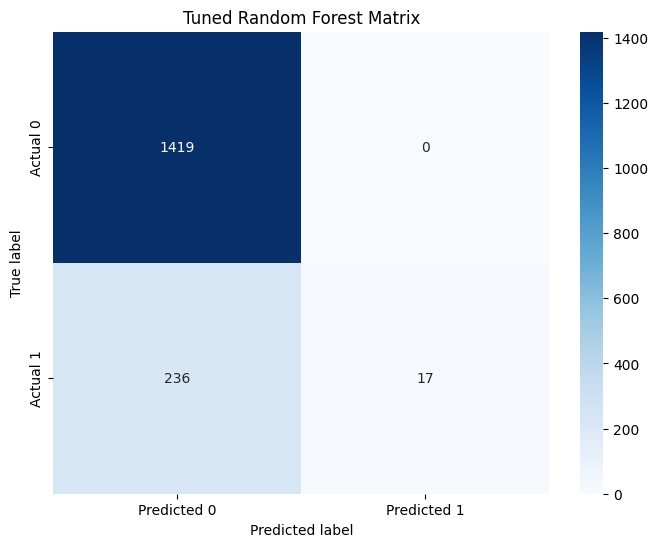

In [ ]:


optimized_rf = RandomForestClassifier(**grid_search_rf.best_params_)
optimized_rf.fit(X_train, y_train)


y_pred_rf = optimized_rf.predict(X_test)
print("Accuracy of Optimized Random Forest: ", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Optimized Random Forest:\n", classification_report(y_test, y_pred_rf))


conf_matrix = confusion_matrix(y_test, y_pred_rf)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Tuned Random Forest Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
